## Perceptrion Model

In [1]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Adaline Model

In [2]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            print("Interation " + str(i))
            print(" Output: ")
            print(output)
            errors = (y - output)
            print(" Error: ")
            print(errors)
            delta_weight = X.T.dot(errors)
            print(" Delta Weight: ")
            print(delta_weight)
            self.w_[1:] += self.eta * delta_weight
            self.w_[0] += self.eta * errors.sum()
            print(" Updated weight (including W_0:) ")
            print(self.w_)
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [ ]:
class AdalineGD2(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = [0.2, 0.3, -0.5]
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            print("Interation " + str(i))
            print(" Output: ")
            print(output)
            errors = (y - output)
            print(" Error: ")
            print(errors)
            delta_weight = X.T.dot(errors)
            print(" Delta Weight: ")
            print(delta_weight)
            self.w_[1:] += self.eta * delta_weight
            self.w_[0] += self.eta * errors.sum()
            print(" Updated weight (including W_0:) ")
            print(self.w_)
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Part 2/3

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Exercise 1:
Extract only the features of sepal length and petal length (feature column 0 and 2).<br>
Choose the last 100 samples from the 150 sample set (Versicolor and Virginica).<br>
Visualize the sample distribution in the two dimentional feature space.<br>
Use blue color to mark Versicolor, and green for Virginica.

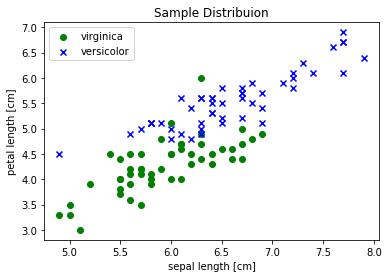

In [4]:
df = pd.read_csv('../COMP-ML-FALL2020/week2/iris.csv')

# Extract only the features of sepal length and petal length (feature column 0 and 2).
# Choose the last 100 samples from the 150 sample set (Versicolor and Virginica).
y = df.iloc[50:151, 4].values
X = df.iloc[50:151, [0, 2]].values
y = np.where(y == 'Iris-virginica', -1, 1)

# Visualize the sample distribution in the two dimentional feature space.
# Use blue color to mark Versicolor, and green for Virginica.
plt.scatter(X[:50, 0], X[:50, 1], color='green', marker='o', label='virginica')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.title('Sample Distribuion')
plt.show()

## Exercise 2:
Use the perceptron model to classify this sample set. Set eta = 0.1 and use 10 epochs. Plot the misclassification errors versus the number of 10 epochs.

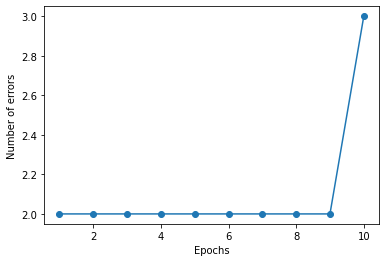

In [5]:
# Use the perceptron model to classify this sample set. 
# Set eta = 0.1 and use 10 epochs. 
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Plot the misclassification errors versus the number of 10 epochs.
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

## Exercise 3:

Plot the misclassification errors versus the number of 100 epochs. 
Does the traning converge if we increase the epoch to 100? Can you explain why? 

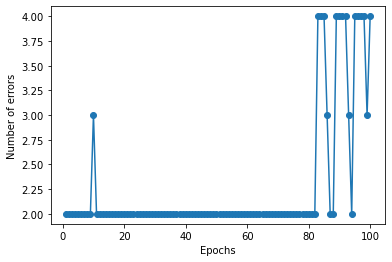

In [6]:
# Using the Perceptron function for extracting iterations against 
ppn = Perceptron(eta=0.1, n_iter=100)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

## Exercise 4

Now let us use the Adaline model to work with the linearly non-separable dataset from the Perceptron exercise 1. 

Extract only the features of sepal length and petal length (feature column 0 and 2).<br>
Choose the last 100 samples from the 150 sample set (Versicolor and Virginica). 

The features need to be standardized. 

Plot the converge graph with an epoch of 20 for learning rate eta=0.01. 


In [7]:
# Extract only the features of sepal length and petal length (feature column 0 and 2).
# Choose the last 100 samples from the 150 sample set (Versicolor and Virginica).
y = df.iloc[50:151, 4].values
y = np.where(y == 'Iris-virginica', -1, 1)

X = df.iloc[50:151, [0, 2]].values
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

0579  0.05052555  0.56163807  0.6316919   0.73669885
 -0.68467067  0.53712661 -0.00197792 -0.45710642  0.20455542 -0.07203175
  0.78572177 -0.47813733  0.26053944  0.65620337  0.10302902  0.5091346
 -0.10002376  0.96078255 -0.09654321  0.98877456  0.78572177  0.20803597
  0.2850509   0.7401794   1.01676657  0.55815752 -0.62868665 -0.20155016
 -0.32758801 -0.14904669  1.31438465  0.70522629  0.55815752  0.63865301
  0.35858528  0.15205195  0.05052555  0.55467697  0.65968392 -0.02300883
 -0.70918213  0.2780898   0.25357834  0.25357834  0.25705889 -1.11180715
  0.12754048  0.37519096 -0.63659243  0.05306142 -0.12896046  0.07409233
  0.8127691  -1.17221641  0.50818992  0.02506941  0.28062567 -0.80817265
 -0.53158548 -0.37755561 -0.73811882 -0.63659243 -0.53158548 -0.30402123
  0.9142955   1.16637121 -0.8116532  -0.14999137 -0.83964521  0.9142955
 -1.01122544 -0.10096844  0.15458782 -1.11275183 -0.96220252 -0.15347192
 -0.09748789  0.23160275  0.48715901 -0.15347192 -0.75914973 -0.07993753


# Part 3: Writing exercise (30 points): 

Following the example in model-trace.pdf, produce the weight update of using the Adaline model with the first two samples of the Iris dataset and using only the first two features. Use the same initial weights and learning rate in the example. You need to include each learning step and calculate the updated weights.  

Submit your work in pdf file. You may take a picture of your written work on paper. 



In [8]:
y = df.iloc[0:2, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

x = df.iloc[0:2, [0, 1]].values
X_std = np.copy(x)
X_std[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
X_std[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

In [10]:
ada = AdalineGD(n_iter=1, eta=0.1)
ada.fit(X_std, y)

Interation 0
 Output: 
[0.01540761 0.0170793 ]
 Error: 
[-1.01540761 -1.0170793 ]
 Delta Weight: 
[ 0.00167169 -0.00167169]
 Updated weight (including W_0:) 
[-0.18700524 -0.00595039 -0.00544889]
